# Advanced Regression : Housing Price Prediction

## By: Edwin Mathew

### Submissing Date : 09/11/2022

## Problem Statement

A US Based company is trying to enter Australian Market trying to understand the market based on the previous sale data from Australia. The outcome of the regression model analytics to be used by the company to make decisions on if the company should buy the properties or not (enter the market) and also help the company understand how the house prices change with variables/features provided in the dataset.

Key Points company is looking to find out are 

- Which variables are significant in predicting the price of a house 
- How well those variables describe the price of a house.

During the process aim is also to find optimal lambda and lasso regression value.

### Steps :

__These are the steps used in the case study to understand, visualise, anlyze and predict data :__

- Read the file, understand the data, remove any duplicates, derive/delete columns/rows if needed, convert columns and visualize the data to see the behaviour (EDA, Exploraroty Data Analysis)
- Data Preparation
- Then the data will be split into trained and test data and train data will be rescalled 
- Feature Selection
- Lasso,Linear and Ridge Regression Model Building
- Decision making

### Libraries used in this Model

In [1729]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") # Surpress warnings

# show all columns are rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import r2_score, mean_squared_error


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

#### Step 1 : Reading and Undestanding the Data

In [1730]:
df = pd.read_csv('train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1731]:
# understanding the shape of the data
intshape = df.shape
print(intshape)

(1460, 81)


In [1732]:
# understanding dataset types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From this we can see that there are missing values present in the data and some data discrepcies compared to the data above.

In [1733]:
# to understand brief distribution of the dataset
df.describe(percentiles=[0.20,0.25,0.30,0.35,0.40,0.5,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
20%,292.800000,20.000000,53.000000,7078.400000,5.000000,5.000000,1947.800000,1961.800000,0.000000,0.000000,0.000000,172.000000,755.800000,848.000000,0.000000,0.000000,1066.600000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,295.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2006.000000,124000.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
30%,438.700000,20.000000,60.000000,8063.700000,5.000000,5.000000,1958.000000,1971.000000,0.000000,0.000000,0.000000,280.000000,840.000000,915.700000,0.000000,0.000000,1208.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1965.000000,1.000000,384.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,135500.000000
35%,511.650000,20.000000,60.000000,8450.000000,5.000000,5.000000,1961.000000,1976.000000,0.000000,56.650000,0.000000,320.650000,864.000000,959.650000,0.000000,0.000000,1262.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1968.000000,2.000000,412.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,141000.000000
40%,584.600000,30.000000,63.000000,8793.400000,6.000000,5.000000,1965.000000,1980.000000,0.000000,218.600000,0.000000,374.600000,910.000000,1000.200000,0.000000,0.000000,1339.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1973.000000,2.000000,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2007.000000,147000.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,19

From describe we can see that there are evidently outliers present in the data.

In [1734]:
df.duplicated().sum()

0

### Step 2 : Fix Data Quality Issues

In [1735]:
#Understand the exact percentage of data missing from the list 

df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Although lot of the columns are showing null due to "NA" present in the column but these "NA"s do have a meaning as per the data description before re-analysing the data "NA" as per the data description will need to be changed to "None" to avoid confusion. Columns that contain NA as per the data description is shown below

- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature
- Alley
- MasVnrType



In [1736]:
cols_none = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu', 
             'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','Alley','MasVnrType']

df[cols_none] = df[cols_none].fillna('None')

There are few more columns not mentioned in the list above will need to be checked 

In [1737]:
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

LotFrontage    17.739726
MasVnrArea      0.547945
Electrical      0.068493
GarageYrBlt     5.547945
dtype: float64

For LotFrontage data missing is 17% i believe this column could have an effect of output so this column will be removed. Also the other three missing values could have and effect on data, so those rows will be removed below as well. Also column ID not provide any insightful information from it.

In [1738]:
df.dropna(subset=['MasVnrArea', 'Electrical','GarageYrBlt'], inplace=True)
df.drop(['Id','LotFrontage'],axis=1, inplace=True)

In [1739]:
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

Series([], dtype: float64)

In [1740]:
update = df.shape
diffshape = update[0]/intshape[0]*100
print (diffshape)

93.83561643835617


it can be seen that we lost roughly 6.2% of data. This amount we can work with, this needs to checked as i through data cleansing i could accidently reduce the data too much.

__Outliers__


From the describe above we can see that up to 99% are valid as it shows the trend so it will be wise remove anything above that and anything below 25% as part of outlier treatment.


Following method is derived from " https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles"

<AxesSubplot:ylabel='SalePrice'>

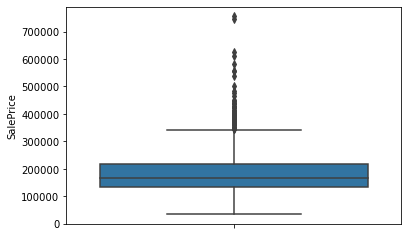

In [1741]:
# analyzing the SalePrice values
sns.boxplot(y=df['SalePrice'])

In [1742]:
#only SalePrice has been chosen at the moment for outlier treatment and rest will be handled 
##during the power transform later on
cols = ['SalePrice'] 
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:ylabel='SalePrice'>

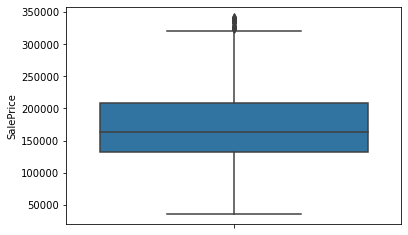

In [1743]:
# analyzing the SalePrice values
sns.boxplot(y=df['SalePrice'])

In [1744]:
df.describe(percentiles=[0.20,0.25,0.30,0.35,0.40,0.5,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,0.99])

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,56.623476,10316.423018,6.067835,5.598323,1971.654726,1984.525915,95.602896,427.564024,49.385671,562.888720,1039.838415,1145.173018,343.329268,3.910061,1492.412348,0.413872,0.060213,1.553354,0.382622,2.861280,1.039634,6.449695,0.611280,1977.350610,1.823933,487.531250,93.199695,45.461890,21.557165,3.445884,15.604421,2.647104,45.079268,6.326982,2007.813262,174452.980183
std,41.547047,8511.400360,1.245270,1.084991,29.187583,20.475304,163.481054,431.295311,166.181889,431.025421,403.214144,355.596183,424.802424,38.024736,473.410809,0.509459,0.241157,0.534304,0.500133,0.770723,0.199042,1.504805,0.632065,24.606634,0.602770,175.923157,123.316903,64.624941,61.033145,29.483064,56.405471,39.534241,514.175892,2.692012,1.331783,58464.445122
min,20.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
20%,20.000000,7164.600000,5.000000,5.000000,1949.000000,1962.000000,0.000000,0.000000,0.000000,173.000000,764.000000,854.200000,0.000000,0.000000,1077.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2006.000000,127000.000000
25%,20.000000,7587.250000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,220.750000,800.000000,888.000000,0.000000,0.000000,1136.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132500.000000
30%,20.000000,8080.400000,5.000000,5.000000,1958.000000,1970.000000,0.000000,0.000000,0.000000,279.000000,844.300000,920.900000,0.000000,0.000000,1214.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1964.000000,2.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,137930.000000
35%,20.000000,8469.650000,5.000000,5.000000,1962.000000,1976.000000,0.000000,70.800000,0.000000,319.850000,864.000000,960.000000,0.000000,0.000000,1266.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1968.000000,2.000000,426.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,143000.000000
40%,30.000000,8805.600000,6.000000,5.000000,1965.000000,1979.000000,0.000000,224.800000,0.000000,372.000000,911.400000,1001.400000,0.000000,0.000000,1338.400000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1971.000000,2.000000,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2007.000000,148620.000000
50%,50.000000,9485.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,384.000000,0.000000,477.500000,990.000000,1082.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.0000

In [1745]:
update = df.shape
diffshape = update[0]/intshape[0]*100
print (diffshape)

89.86301369863014


After data cleaning and removing outliners, roughly 10% of the data has been lost. As general rule of thumb 20-30% is maximum allowed data to be removed so any more data lost needed to be controlled.

### Step 3 : Transform Numerical Feature to Catergorical Feature

One of the features in the data stated as numerical but the meaning behind it shows as categorical as per the Data description. 

- MSSubClass

As MSSubClass  is the description of the dwelling while OverallQual and OverallCond are rating.

In [1746]:

varlist1 = ['MSSubClass']

# Defining the map function
def MSSubClass_map(x):
    return x.map({20: "1-STORY 1946 & NEWER ALL STYLES", 30: "1-STORY 1945 & OLDER", 40: "1-STORY W/FINISHED ATTIC ALL AGES",
                  45: "1-1/2 STORY - UNFINISHED ALL AGES", 50: "1-1/2 STORY FINISHED ALL AGES", 60: "2-STORY 1946 & NEWER",
                 70: "2-STORY 1945 & OLDER", 75: "2-1/2 STORY ALL AGES", 80: "SPLIT OR MULTI-LEVEL", 85: "SPLIT FOYER",
                 90: "DUPLEX - ALL STYLES AND AGES",120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
                 150: "1-1/2 STORY PUD - ALL AGES",160: "2-STORY PUD - 1946 & NEWER",180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
                 190: "2 FAMILY CONVERSION - ALL STYLES AND AGES"})

# Applying the function to the housing list
df[varlist1] = df[varlist1].apply(MSSubClass_map)


There is one feature which can be converted into numerical since it is Yes or No decision

In [1747]:
varlist2 = ['CentralAir']

# Defining the map function
def map(x):
    return x.map({"Y":1,"N":0})

# Applying the function to the housing list
df[varlist2] = df[varlist2].apply(map)

In [1748]:
df.head(5)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,2-STORY 1946 & NEWER,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,2-STORY 1945 & OLDER,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,2-STORY 1946 & NEWER,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


### Step 4 : Deriving New Features

There are couple of key features can be derived from this the age of the property and also the date last modified as described by the data dictionary.

In [1749]:
df['HouseAge'] = df['YrSold']- df['YearBuilt']
df['Mod'] = df['YrSold'] - df['YearRemodAdd']
# Same as construction date if no remodelling or additions
df['LastModified'] = df.apply(lambda x: x['HouseAge'] if x['Mod'] == 0 else x['Mod'], axis=1)

We can drop Yearbuilt,YrSold and YearRemodAdd since the age has been derived from the data.

In [1750]:
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1,inplace=True)

### Step 5 : Data Visualisation

By Visualising the data we can understand Multicoliniarity between features and also see the linearity between SalePrice and other features. 

First thing need to be assesed is the amount of numerical and categorical features available in the data.

In [1751]:
print(df.dtypes.value_counts())

object     43
int64      34
float64     1
dtype: int64


Since there is loads of data in this model, numerical data needs to be seperated for numerical visulasation to make it easier

In [1752]:
# There are 36 numerical features and 46 categorical features available in this dataset
df_numeric = df.select_dtypes(include=['float64','int64'])
cor = df_numeric.corr()
cor

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,Mod,LastModified
LotArea,1.000000,0.052239,0.012603,0.083460,0.197220,0.055166,0.005409,0.239473,0.035077,0.293490,0.045694,0.001616,0.261583,0.120951,0.066942,0.106771,-0.000092,0.141166,-0.016513,0.178543,0.271036,0.126378,0.170312,0.172206,0.107494,-0.009829,0.029770,0.037283,0.098171,0.053491,0.003374,0.235972,0.017443,-0.005279,-0.000368
OverallQual,0.052239,1.000000,-0.119263,0.315666,0.127825,-0.064937,0.324889,0.457262,0.226802,0.376770,0.285057,-0.042721,0.535362,0.060316,-0.054252,0.545413,0.244885,0.089288,-0.173959,0.360235,0.334920,0.516914,0.462832,0.185417,0.299989,-0.096273,0.022237,0.038152,0.050005,-0.023821,0.068921,0.778619,-0.563673,-0.542482,-0.549860
OverallCond,0.012603,-0.119263,1.000000,-0.126457,-0.018585,0.036806,-0.143816,-0.158446,0.095345,-0.128689,0.006993,0.009644,-0.089613,-0.041246,0.121660,-0.221554,-0.062353,0.002641,-0.099296,-0.059805,-0.018747,-0.240015,-0.190340,0.001142,-0.051386,0.068475,0.032739,0.046409,0.001957,0.079156,-0.010885,-0.068901,0.392115,-0.066010,-0.045218
MasVnrArea,0.083460,0.315666,-0.126457,1.000000,0.209112,-0.068044,0.082939,0.284291,0.110630,0.255047,0.132350,-0.060180,0.305502,0.063126,0.018929,0.216972,0.167752,0.111141,-0.005001,0.212388,0.199957,0.284564,0.289938,0.100041,0.124401,-0.100175,0.011256,0.060389,0.024749,-0.026931,0.005705,0.345262,-0.271101,-0.125797,-0.128376
BsmtFinSF1,0.197220,0.127825,-0.018585,0.209112,1.000000,-0.057640,-0.529949,0.479386,0.135702,0.394320,-0.172163,-0.040338,0.138463,0.629394,0.068749,0.000578,-0.035967,-0.102059,-0.066475,-0.023256,0.209217,0.124203,0.222512,0.171082,0.098981,-0.096379,0.009530,0.068818,0.129505,0.013181,-0.025358,0.272222,-0.189835,-0.070223,-0.072116
BsmtFinSF2,0.055166,-0.064937,0.036806,-0.068044,-0.057640,1.000000,-0.220140,0.115164,0.026817,0.114271,-0.103224,0.010702,-0.005933,0.161736,0.076048,-0.086087,-0.025290,-0.005794,-0.039135,-0.034942,0.042168,-0.065563,-0.033200,0.079936,0.014893,0.046699,-0.030905,0.088468,0.047648,0.005459,-0.016606,-0.007459,0.060145,0.069134,0.064605
BsmtUnfSF,0.005409,0.324889,-0.143816,0.082939,-0.529949,-0.220140,1.000000,0.411389,0.023698,0.299242,-0.010518,-0.013376,0.214259,-0.425694,-0.098137,0.286822,-0.064513,0.137227,0.021648,0.220127,0.038636,0.241180,0.202330,-0.026863,0.126295,-0.007238,0.028320,-0.026905,-0.033372,-0.018514,0.049100,0.223911,-0.155094,-0.188085,-0.188104
TotalBsmtSF,0.239473,0.457262,-0.158446,0.284291,0.479386,0.115164,0.411389,1.000000,0.181538,0.788760,-0.237939,-0.053035,0.374698,0.284830,-0.000025,0.271743,-0.117858,0.035138,-0.064093,0.196033,0.282468,0.363646,0.440611,0.187226,0.247018,-0.091581,0.027729,0.081312,0.122489,-0.003442,0.018518,0.527462,-0.344058,-0.247679,-0.251590
CentralAir,0.035077,0.226802,0.095345,0.110630,0.135702,0.026817,0.023698,0.181538,1.000000,0.121565,-0.036268,-0.018973,0.057244,0.097605,0.030521,0.097057,0.118848,-0.002534,-0.244816,0.002336,0.152286,0.118165,0.125544,0.120130,0.021982,-0.157021,0.027548,0.040799,0.015782,0.013529,0.009595,0.253715,-0.356620,-0.274600,-0.270378
1stFlrSF,0.293490,0.376770,-0.128689,0.255047,0.394320,0.114271,0.299242,0.788760,0.121565,1.000000,-0.279107,-0.024514,0.498719,0.225379,0.006238,0.326111,-0.204902,0.120477,0.090095,0.340328,0.357528,0.370785,0.442740,0.187694,0.206943,-0.059393,0.050775,0.087272,0.127415,-0.009150,0.045208,0.506980,-0.219858,-0.193521,-0.193632


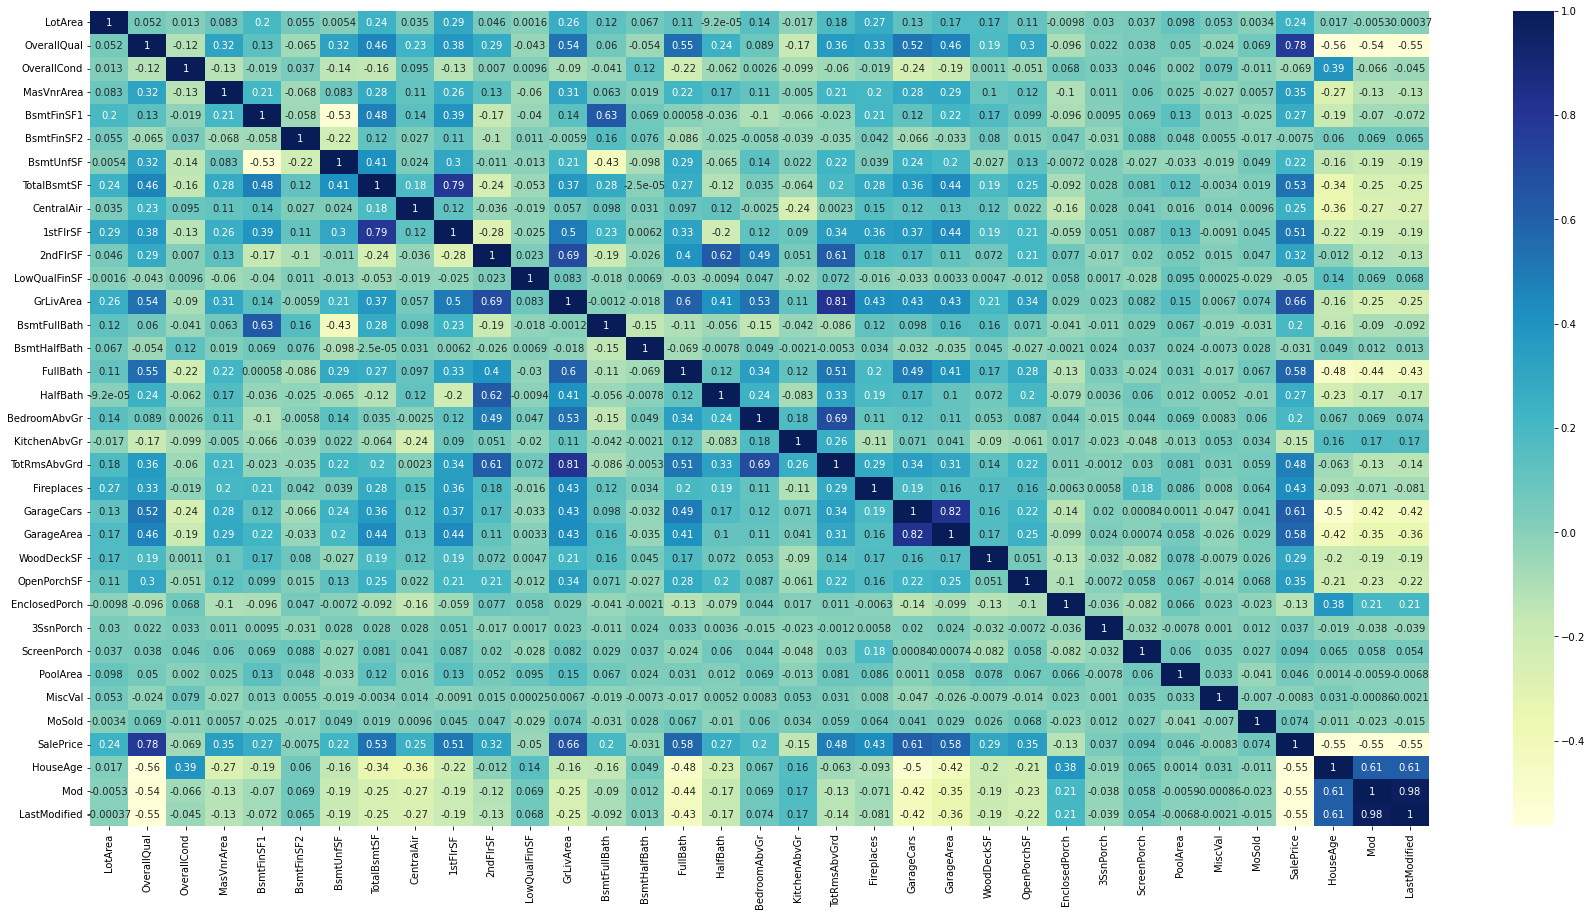

In [1753]:
#plotting the correlation in a sns heatmap

plt.figure(figsize=(30,15))

#heatmap
sns.heatmap(cor,cmap='YlGnBu',annot=True)
plt.show()

The heatmap shows the following trends :

Correlation of Saleprice with other variables:

- Price if highly correlated with GrlivArea, GarageCars, GarageArea, FullBath, YearBuilt, YearRemodAdd, TotalBsmtSF

- Price is negativily correlated with EnclosedPorch, KitchenAbveGr,HouseAge, Mod, LastModified


The relationship will be plotted below to see the correlation better.

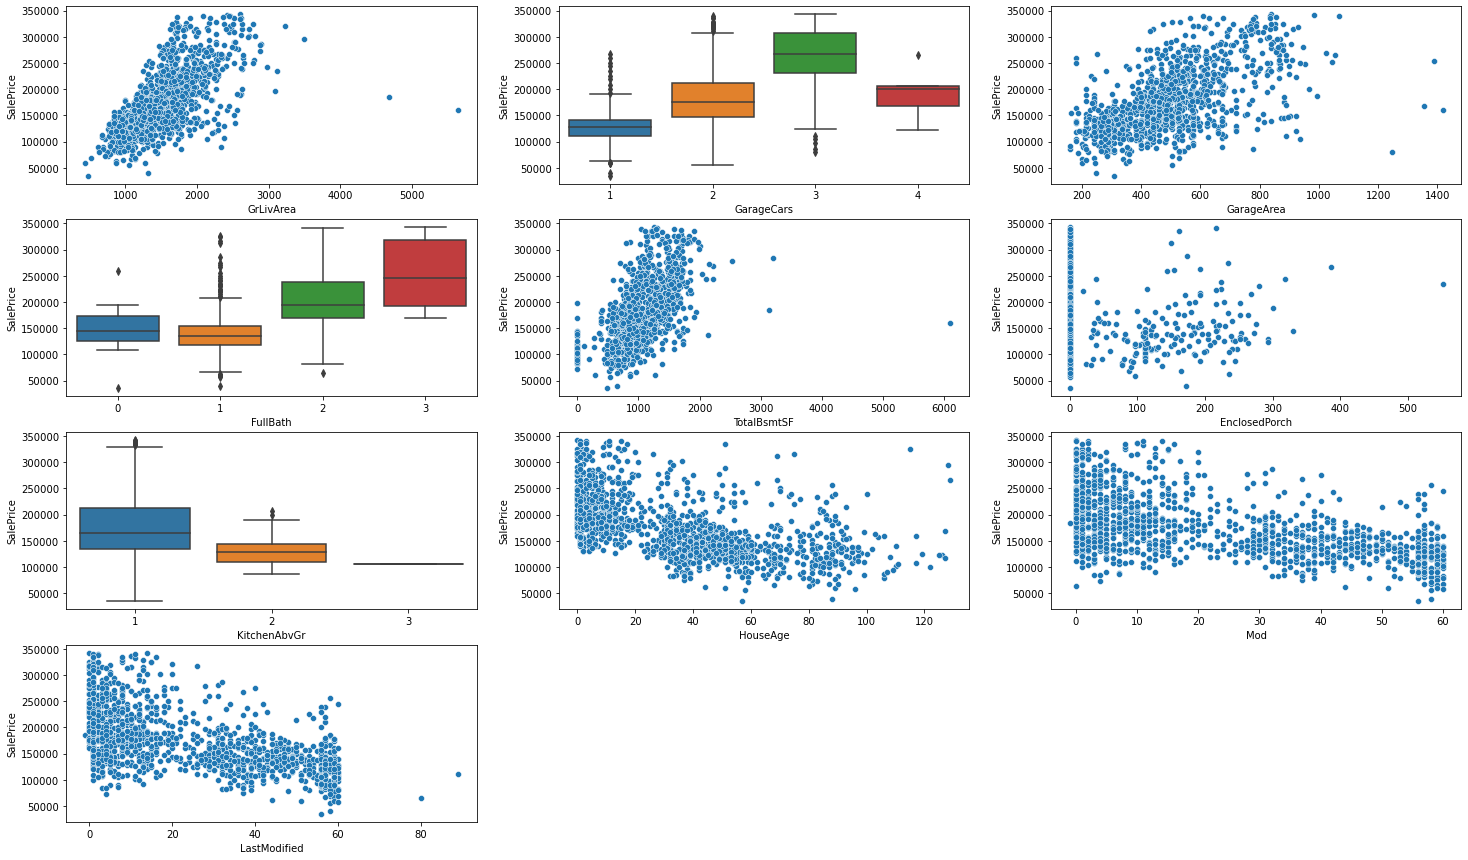

In [1754]:
plt.figure(figsize=(25, 15))
plt.subplot(4,3,1)
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df_numeric)
plt.subplot(4,3,2)
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = df_numeric)
plt.subplot(4,3,3)
sns.scatterplot(x = 'GarageArea', y = 'SalePrice', data = df_numeric)
plt.subplot(4,3,4)
sns.boxplot(x = 'FullBath', y = 'SalePrice', data = df_numeric)
plt.subplot(4,3,5)
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice', data = df_numeric)
plt.subplot(4,3,6)
sns.scatterplot(x = 'EnclosedPorch', y = 'SalePrice', data = df_numeric)
plt.subplot(4,3,7)
sns.boxplot(x = 'KitchenAbvGr', y = 'SalePrice', data = df_numeric)
plt.subplot(4,3,8)
sns.scatterplot(x = 'HouseAge', y = 'SalePrice', data = df_numeric)
plt.subplot(4,3,9)
sns.scatterplot(x = 'Mod', y = 'SalePrice', data = df_numeric)
plt.subplot(4,3,10)
sns.scatterplot(x = 'LastModified', y = 'SalePrice', data = df_numeric)


plt.show()


Due to the multicolinarity between following features one of the feature will be removed from the list

- __GarageCars__ and GarageArea
- __1stFlrSF__ and TotalBsmtSF
- __HouseAge, Mod,__ and LastModified

GarageCars, 1stFlrSF, HouseAge and Mod will be removed from the coloumns. 

In [1755]:
df.drop(['GarageCars','1stFlrSF','HouseAge','Mod'],axis=1, inplace=True)

#### Numerical Data Observation

- Recently Modified and New homes are expensive than older homes.
- GrLivArea has a direct imapact to the cost of the house
- TotalBsmtSf has also got direct impact to the cost of the house
- GrLivArea and TotalBsmtSF got linear relationship to SalePrice

In [1756]:

# create figure
fig = plt.figure(figsize=(200, 100), dpi=80)
cat = df.select_dtypes(exclude = ['int64', 'float64'])

pricec = df["SalePrice"]
cat1 = pd.concat([cat,pricec], axis = 1)
# add subplots
for i, col in enumerate(cat1.columns[:-1], 1):
    plt.subplot(7, 10, i)
    ax = sns.boxplot(x=col, y='SalePrice', data=cat1)
    x = plt.xticks(rotation=90)
    plt.title(col)
    

### Category Observation:

There are loads of variable which shows price has an effect on it some of them has been shown below as they stands out slightly bigger than others

- MsSubClass - 2 Story 1946 & Newer
- Masonary Veneer Type - Stone
- HeatingQC- Excellent
- ExterQual - Excellent
- MSZoning - Floating village Residential 
- Electrical - Standard Circuit Breaker & Ronex
- KitchenQual - Excellent
- BsmtQual - Excellent
- OverQual - Excellent or higher, low for poor
- BsmtFnType1  - Good Living Quaters

### Step 6 : Dummy Variables

Next is to convert categorical features with multiple variable into numerical format by using dummy variable method 

In [1757]:
#cat.info()

Now ordinal data needs to be converted into numbers so it can analysed in the data properly. 

These are the ordinal columns in the data


- ExterQual
- ExterCond
- HeatingQC
- KitchenQual
- PoolQC
- BsmtQual
- BsmtCond
- FireplaceQu
- GarageQual
- GarageCond
- BsmtExposure


In [1758]:
# Defining the map function
def Qual_map(x):
    return x.map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1})

def Cond_map(x):
    return x.map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1,'None':0})

def Expo_map(x):
    return x.map({ 'Gd':4, 'Av':3, 'Mn':2,'No':1,'None':0})

def QC_map(x):
    return x.map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1,'None':0})


# Applying the function 
df[['ExterQual']]  = df[['ExterQual']].apply(Qual_map)
df[['ExterCond']]  = df[['ExterCond']].apply(Qual_map)
df[['HeatingQC']]  = df[['HeatingQC']].apply(Qual_map)
df[['KitchenQual']]  = df[['KitchenQual']].apply(Qual_map)


df[['PoolQC']]  = df[['PoolQC']].apply(QC_map)


df[['BsmtQual']]  = df[['BsmtQual']].apply(Cond_map)
df[['BsmtCond']]  = df[['BsmtCond']].apply(Cond_map)
df[['FireplaceQu']]  = df[['FireplaceQu']].apply(Cond_map)
df[['GarageQual']]  = df[['GarageQual']].apply(Cond_map)
df[['GarageCond']]  = df[['GarageCond']].apply(Cond_map)

df[['BsmtExposure']]  = df[['BsmtExposure']].apply(Expo_map)





df.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LastModified
0,2-STORY 1946 & NEWER,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,GLQ,706,Unf,0,150,856,GasA,5,1,SBrkr,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,RFn,548,3,3,Y,0,61,0,0,0,0,0,None,None,0,2,WD,Normal,208500,5
1,1-STORY 1946 & NEWER ALL STYLES,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,ALQ,978,Unf,0,284,1262,GasA,5,1,SBrkr,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,RFn,460,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,WD,Normal,181500,31
2,2-STORY 1946 & NEWER,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,GLQ,486,Unf,0,434,920,GasA,5,1,SBrkr,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,RFn,608,3,3,Y,0,42,0,0,0,0,0,None,None,0,9,WD,Normal,223500,6
3,2-STORY 1945 & OLDER,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,ALQ,216,Unf,0,540,756,GasA,4,1,SBrkr,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,Unf,642,3,3,Y,0,35,272,0,0,0,0,None,None,0,2,WD,Abnorml,140000,36
4,2-STORY 1946 & NEWER,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,GLQ,655,Unf,0,490,1145,GasA,5,1,SBrkr,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,RFn,836,3,3,Y,192,84,0,0,0,0,0,None,None,0,12,WD,Normal,250000,8


Dummies will be created for most of the above categorical variables, except for ordinal categorical variables listed on the next section they will be converted into numerical variables.

In [1759]:
df_categorical = df.select_dtypes(include = ['object'])
df_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtFinType1,BsmtFinType2,Heating,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GLQ,Unf,GasA,SBrkr,Typ,Attchd,RFn,Y,None,None,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,ALQ,Unf,GasA,SBrkr,Typ,Attchd,RFn,Y,None,None,WD,Normal
2,2-STORY 1946 & NEWER,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GLQ,Unf,GasA,SBrkr,Typ,Attchd,RFn,Y,None,None,WD,Normal
3,2-STORY 1945 & OLDER,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,ALQ,Unf,GasA,SBrkr,Typ,Detchd,Unf,Y,None,None,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GLQ,Unf,GasA,SBrkr,Typ,Attchd,RFn,Y,None,None,WD,Normal


In [1760]:
cat_dummies = pd.get_dummies(df_categorical, drop_first=True)
cat_dummies.head()

df = df.drop(list(df_categorical.columns),axis=1)
df = pd.concat([df, cat_dummies], axis = 1) 

df.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,SalePrice,LastModified,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition

### Step 7 : Removing highly correlated, Splitting and scalling the data 

Next will be to identify the possible correlations between columns and remove one of the feature to avoid colinearity. the solution is taken from the below link

https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

In [1761]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df, .6)

MiscFeature_None                                                  MiscFeature_Shed                        -0.958465
RoofStyle_Hip                                                     RoofStyle_Gable                         -0.929523
BsmtFinType1_None                                                 BsmtCond                                -0.850807
BsmtFinType2_None                                                 BsmtCond                                -0.836793
GarageType_Detchd                                                 GarageType_Attchd                       -0.836231
MasVnrType_BrkFace                                                MasVnrType_None                         -0.818115
MSZoning_RM                                                       MSZoning_RL                             -0.807135
2ndFlrSF                                                          HouseStyle_1Story                       -0.800013
Heating_GasW                                                      Heatin

In [1762]:
df = df.drop(['MiscFeature_None', 'RoofStyle_Hip','BsmtFinType1_None','GarageType_Attchd','BsmtCond',
              'MasVnrType_None','Heating_GasA','MSZoning_RL','HouseStyle_1Story','Foundation_CBlock',
              'BsmtFinSF2','BsmtCond','RoofMatl_CompShg','MasVnrArea','2ndFlrSF','Functional_Maj2',
              'KitchenAbvGr','HouseStyle_2.5Unf','MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
              'Exterior1st_Plywood','HouseStyle_2Story','MSSubClass_SPLIT FOYER','Exterior1st_Stucco',
              'MSSubClass_1-STORY 1946 & NEWER ALL STYLES','HouseStyle_2Story','TotRmsAbvGrd','Foundation_Slab',
              'Neighborhood_Somerst','Exterior2nd_Wd Sdng','Fireplaces','HouseStyle_SLvl','BsmtFinType2_None',
              'Exterior1st_VinylSd','BsmtFinType2_None','Exterior1st_VinylSd','SaleCondition_Partial',
              'PoolArea','Exterior1st_CemntBd','MasVnrType_None','Foundation_Slab','Alley_None'],axis=1)

#the above columns that had up to 69% correlation has been removed from the data set.

Data is split into X and Y below

In [1763]:
X = df.drop('SalePrice', axis=1) 
y = df['SalePrice']
df.head()


,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,MiscVal,MoSold,SalePrice,LastModified,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_SFoyer,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Stone,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,8450,7,5,4,3,4,1,706,150,856,5,1,0,1710,1,0,2,1,3,4,0,548,3,3,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,9600,6,8,3,3,4,4,978,284,1262,5,1,0,1262,0,1,2,0,3,3,3,460,3,3,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0

Data will be scalled below since the it is necassary for regression to scale the data, data is stored in a X column below as the scalling process will loose in column name since it is saved in a numpy array.

In [1764]:

from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=195)

Below the data is split into training set and testing set.

In [1765]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=42)

In [1766]:
X_train.head()

,LotArea,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,MiscVal,MoSold,LastModified,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_SFoyer,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Stone,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
781,-0.154725,1.552195,-0.551665,1.175881,-0.271385,0.641629,1.369913,-0.843280,1.293018,0.357667,0.900412,0.235607,-0.102869,2.361614,-0.812686,-0.249781,0.836259,1.234900,1.478032,2.445838,1.218004,0.355227,0.110423,0.111812,0.931292,4.930907,-0.353339,-0.116921,-0.276753,-0.061851,-0.087706,0.621712,-1.149615,-0.330219,-0.201107,-0.0553,-0.12754,-0.100038,-0.211154,1.950862,-0.220819,-0.177332,-0.06778,-0.211154,4.528598,-0.096077,-0.412775,0.061851,-0.172706,-0.165554,-0.083109,0.762052,-0.175032,-0.155563,0.323074,-0.027618,-0.261541,-0.184079,-0.0553,0.630263,-0.213116,-0.091951,-0.039073,-0.107541,-0.194871,-0.144954,-0

### Step 8:Initial Regression Analysis

#### Step 8.1 Linear Regression

In [1767]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [1768]:
import sklearn.metrics as metrics

y_t_pred = lm.predict(X_train)
metrics.r2_score(y_true = y_train, y_pred = y_t_pred)

0.9059068472404425

In [1769]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true = y_test, y_pred = y_test_pred)

-5.945054274778401e+25

In [1770]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric0 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric0.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric0.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric0.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric0.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric0.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric0.append(mse_test_lr**0.5)

0.9059068472404425
-5.945054274778401e+25
274592976000.76855
9.256473829548895e+37
299120888.8897261
2.349358839987029e+35


#### Step 8.2 Ridge Regression

In [1771]:
# Below is the list of alphas (hyperparameters) to tune, if the value is too high it can lead to underfitting
# if the value is low it will not be able to handle overfitting.
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [1772]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
ridge_output = pd.DataFrame(model_cv.cv_results_)
ridge_output.head(28)

{'alpha': 500}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017028,0.013301,0.009695,0.003164,0.0001,{'alpha': 0.0001},0.434567,0.805980,0.756388,0.796456,0.765703,0.711819,0.139849,28,0.938956,0.910862,0.908960,0.912113,0.913204,0.916819,0.011158
1,0.010374,0.002783,0.005005,0.001548,0.001,{'alpha': 0.001},0.434571,0.805982,0.756389,0.796462,0.765705,0.711822,0.139848,27,0.938956,0.910862,0.908960,0.912113,0.913204,0.916819,0.011158
2,0.011662,0.002912,0.006653,0.002346,0.01,{'alpha': 0.01},0.434612,0.805997,0.756397,0.796522,0.765721,0.711850,0.139843,26,0.938956,0.910862,0.908960,0.912113,0.913204,0.916819,0.011158
3,0.011455,0.004150,0.006054,0.002106,0.05,{'alpha': 0.05},0.434796,0.806065,0.756432,0.796788,0.765794,0.711975,0.139819,25,0.938956,0.910862,0.908960,0.912113,0.913204,0.916819,0.011158
4,0.009949,0.002065,0.005387,0.001356,0.1,{'alpha': 0.1},0.435024,0.806150,0.756476,0.797118,0.765884,0.712130,0.139790,24,0.938956,0.910862,0.908959,0.912113,0.913204,0.916819,0.011158
5,0.009763,0.003392,0.006703,0.001621,0.2,{'alpha': 0.2},0.435478,0.806317,0.756564,0.797767,0.766064,0.712438,0.139731,23,0.938956,0.910862,0.908959,0.912112,0.913204,0.916818,0.011158
6,0.010483,0.001843,0.005078,0.001946,0.3,{'alpha': 0.3},0.435928,0.806483,0.756651,0.798403,0.766242,0.712741,0.139672,22,0.938955,0.910861,0.908958,0.912111,0.913203,0.916818,0.011158
7,0.009443,0.001987,0.006471,0.002016,0.4,{'alpha': 0.4},0.436375,0.806647,0.756737,0.799028,0.766419,0.713041,0.139612,21,0.938954,0.910860,0.908958,0.912110,0.913202,0.916817,0.011158
8,0.008291,0.001951,0.006712,0.001577,0.5,{'alpha': 0.5},0.436818,0.806809,0.756822,0.799640,0.766594,0.713337,0.139553,20,0.938953,0.910858,0.908957,0.912108,0.913201,0.916815,0.011158
9,0.008821,0.002119,0.003983,0.000583,0.6,{'alpha': 0.6},0.437258,0.806969,0.756907,0.800240,0.766768,0.713628,0.139493,19,0.938951,0.910857,0.908955,0.912106,0.913199,0.916814,0.011158


In [1773]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.54751847e+03  6.98303041e+03  2.07373833e+03  2.99067629e+03
 -6.70605249e+02  2.94771325e+03  2.17010260e+03  9.45386222e+02
  1.12171350e+03  2.41930064e+03  1.78335676e+03  1.07421772e+03
 -4.37236976e+02  6.81453390e+03  1.57048577e+03 -2.77394938e+01
  3.98559958e+03  1.41852023e+03  2.39478023e+03  3.17178939e+03
  4.37272073e+03  4.63381566e+03  1.47866289e+03  4.39015156e+02
  2.83205893e+03  2.49631740e+03  1.99025687e+02  4.36282484e+02
  1.50332495e+03 -1.78184082e+03  1.41809988e+02  8.07658322e+02
 -2.43455613e+03  1.53594697e+02 -1.07337777e+03  1.13954511e+02
 -5.26589754e+02  4.41034831e+02  7.49104073e+02  1.40172255e+03
 -1.64217638e+03 -5.17854616e+02 -2.71410799e+02 -5.76081322e+02
  1.68175798e+03 -6.05084531e+02 -1.99839883e+03  1.01113318e+03
 -6.21937813e+02  4.44703293e+02 -1.07780692e+03 -1.20413697e+03
  5.35801080e+02  6.73339654e+02  1.06974940e+03 -9.14930232e+02
  8.22708196e+02 -1.05426991e+03  1.20179290e+02 -6.20271411e+02
  1.22633221e+03 -3.20873

In [1774]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train5 = ridge.predict(X_train)
y_pred_test5 = ridge.predict(X_test)

metricr = []
r2_train_ridge = r2_score(y_train, y_pred_train5)
print(r2_train_ridge)
metricr.append(r2_train_ridge)

r2_test_ridge= r2_score(y_test, y_pred_test5)
print(r2_test_ridge)
metricr.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train5))
print(rss1_ridge)
metricr.append(rss1_ridge)

rss2_ridge= np.sum(np.square(y_test - y_pred_test5))
print(rss2_ridge)
metricr.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train5)
print(mse_train_ridge)
metricr.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test5)
print(mse_test_ridge)
metricr.append(mse_test_ridge**0.5)

0.8740409122069843
0.8508971711100868
367587648591.28394
232153714624.01562
400422275.1539041
589222625.9492782


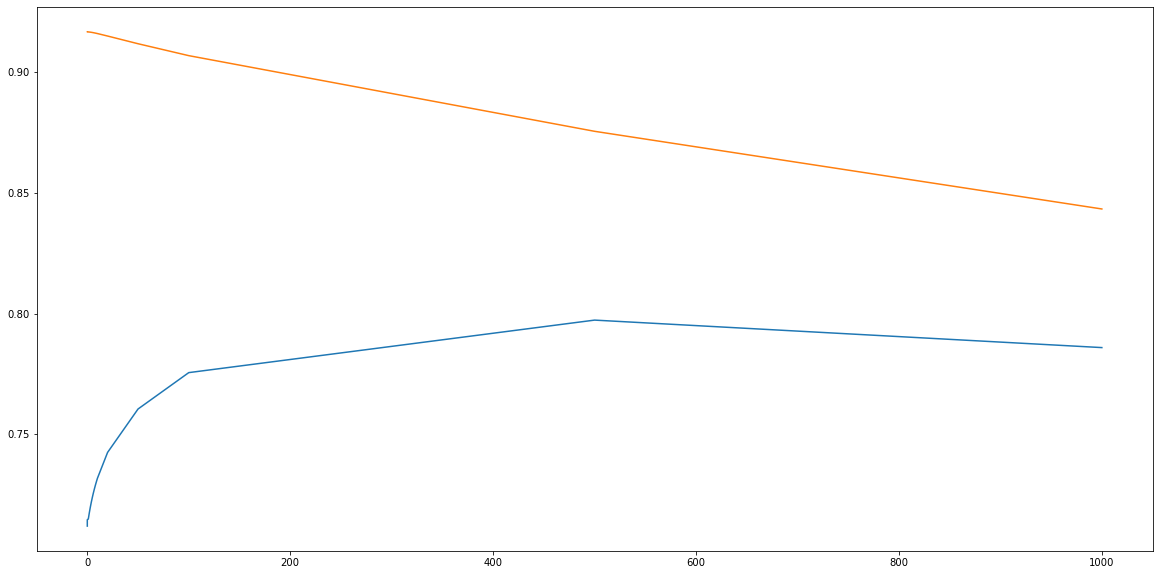

In [1775]:
ridge_output['param_alpha'] = ridge_output['param_alpha'].astype('int32')


plt.figure(figsize=(20,10))
plt.plot(ridge_output['param_alpha'],ridge_output['mean_test_score'])
plt.plot(ridge_output['param_alpha'],ridge_output['mean_train_score'])

#### Step 8.3 Lasso Regression

In [1776]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [1777]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
lasso_output = pd.DataFrame(model_cv.cv_results_)
lasso_output.head(28)

{'alpha': 1000}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.217533,0.123514,0.003521,0.000056,0.0001,{'alpha': 0.0001},0.434567,0.805567,0.756388,0.796455,0.756807,0.709957,0.139150,28,0.938956,0.910862,0.908960,0.912113,0.913204,0.916819,0.011158
1,0.176570,0.051830,0.003482,0.000046,0.001,{'alpha': 0.001},0.434567,0.805570,0.756388,0.796457,0.756807,0.709958,0.139150,27,0.938956,0.910862,0.908960,0.912113,0.913204,0.916819,0.011158
2,0.122715,0.004225,0.003708,0.000559,0.01,{'alpha': 0.01},0.434572,0.805608,0.756389,0.796468,0.756810,0.709969,0.139156,26,0.938956,0.910862,0.908960,0.912113,0.913204,0.916819,0.011158
3,0.142999,0.041803,0.005322,0.003572,0.05,{'alpha': 0.05},0.434591,0.805762,0.756394,0.796520,0.756823,0.710018,0.139177,25,0.938956,0.910862,0.908960,0.912113,0.913204,0.916819,0.011158
4,0.173732,0.039830,0.006194,0.003473,0.1,{'alpha': 0.1},0.434615,0.805867,0.756401,0.796585,0.756839,0.710061,0.139191,24,0.938956,0.910862,0.908960,0.912113,0.913204,0.916819,0.011158
5,0.178629,0.055057,0.004298,0.001141,0.2,{'alpha': 0.2},0.434664,0.805983,0.756413,0.796715,0.756871,0.710129,0.139207,23,0.938956,0.910862,0.908960,0.912113,0.913204,0.916819,0.011158
6,0.148821,0.023088,0.003554,0.000102,0.3,{'alpha': 0.3},0.434712,0.806083,0.756424,0.796845,0.756903,0.710193,0.139221,22,0.938956,0.910862,0.908960,0.912113,0.913204,0.916819,0.011158
7,0.137812,0.018529,0.003654,0.000454,0.4,{'alpha': 0.4},0.434760,0.806105,0.756436,0.796975,0.756935,0.710242,0.139224,21,0.938956,0.910862,0.908959,0.912113,0.913204,0.916819,0.011158
8,0.139750,0.025561,0.003467,0.000086,0.5,{'alpha': 0.5},0.434809,0.806127,0.756448,0.797099,0.756974,0.710291,0.139227,20,0.938956,0.910862,0.908959,0.912113,0.913204,0.916819,0.011158
9,0.120741,0.007610,0.003757,0.000761,0.6,{'alpha': 0.6},0.434851,0.806150,0.756460,0.797227,0.757007,0.710339,0.139232,19,0.938956,0.910862,0.908959,0.912113,0.913204,0.916819,0.011158


In [1778]:
#Fitting Ridge model for alpha =  and printing coefficients which have been penalised

alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1000)

In [1779]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train6 = lasso.predict(X_train)
y_pred_test6 = lasso.predict(X_test)

metricl = []
r2_train_lasso = r2_score(y_train, y_pred_train6)
print(r2_train_lasso)
metricl.append(r2_train_lasso)

r2_test_lasso  = r2_score(y_test, y_pred_test6)
print(r2_test_lasso)
metricl.append(r2_test_lasso)

rss1_lasso  = np.sum(np.square(y_train - y_pred_train6))
print(rss1_lasso)
metricl.append(rss1_lasso)

rss2_lasso  = np.sum(np.square(y_test - y_pred_test6))
print(rss2_lasso)
metricl.append(rss2_lasso)

mse_train_lasso  = mean_squared_error(y_train, y_pred_train6)
print(mse_train_lasso)
metricl.append(mse_train_lasso**0.5)

mse_test_lasso  = mean_squared_error(y_test, y_pred_test6)
print(mse_test_lasso )
metricl.append(mse_test_lasso **0.5)

0.870237284047779
0.863870724159747
378687814174.06006
211953839445.42947
412513958.7952724
537953907.2219023


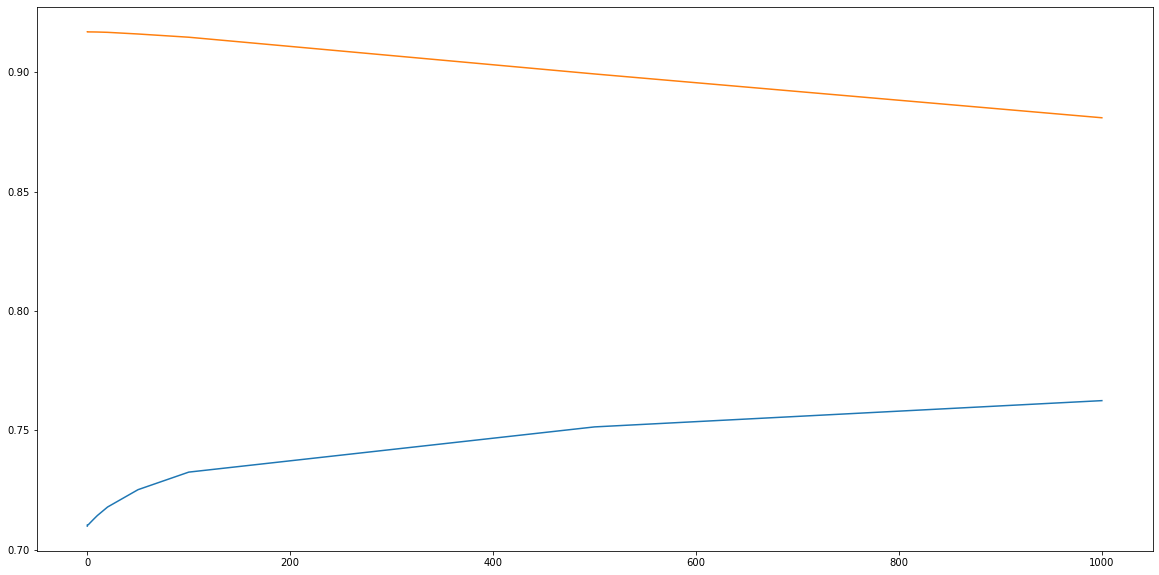

In [1780]:
lasso_output['param_alpha'] = lasso_output['param_alpha'].astype('int32')


plt.figure(figsize=(20,10))
plt.plot(lasso_output['param_alpha'],lasso_output['mean_test_score'])
plt.plot(lasso_output['param_alpha'],lasso_output['mean_train_score'])

__We have found a descent Ridge and Lasso regression above as stated but from this point onwards another method of combining RFE with Ridge and Lasso will be assessed and the discussed at the end for the best result__

Above from linear regression test prediction we can see that this model is heavly overfitted so using RFE method some more feature elimination will be done. After trialling couple of features, i decided to pick n features to be 65.

In [1781]:
rfe = RFE(lm, n_features_to_select=65)       
rfe = rfe.fit(X_train, y_train)

In [1782]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('ExterQual', False, 80),
 ('ExterCond', False, 2),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinSF1', False, 37),
 ('BsmtUnfSF', False, 45),
 ('TotalBsmtSF', False, 9),
 ('HeatingQC', False, 60),
 ('CentralAir', False, 105),
 ('LowQualFinSF', False, 107),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 47),
 ('FullBath', True, 1),
 ('HalfBath', False, 24),
 ('BedroomAbvGr', False, 101),
 ('KitchenQual', True, 1),
 ('FireplaceQu', True, 1),
 ('GarageArea', True, 1),
 ('GarageQual', True, 1),
 ('GarageCond', False, 103),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 53),
 ('3SsnPorch', False, 83),
 ('ScreenPorch', False, 8),
 ('PoolQC', True, 1),
 ('MiscVal', False, 49),
 ('MoSold', False, 57),
 ('LastModified', False, 96),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 25),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 51),
 (

In [1783]:
#assigning filtered coloumns to col
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtQual', 'BsmtExposure',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'PoolQC',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'Neighborhood_BrkSide',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_RRAn', 'Condition1_RRNn',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosN',
      

In [1784]:
X_train_rfe = X_train[col]

In [1785]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train.values.reshape(-1,1), X_train_lm).fit()
#a quick OLS check to see the selected features

In [1786]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     104.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        03:02:24   Log-Likelihood:                -10360.
No. Observations:                 918   AIC:                         2.085e+04
Df Residuals:                     855   BIC:                         2.115e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [1787]:
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [1788]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif_torem = vif[vif['VIF']>5]
print(vif)

#doing VIF and assigning VIF to remove anything above 5 VIF score needs to be removed

                                             Features    VIF
45                                    BldgType_Duplex    inf
48                                     RoofStyle_Shed    inf
17            MSSubClass_DUPLEX - ALL STYLES AND AGES    inf
15  MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...    inf
43                                    Condition2_RRAe    inf
44                                    BldgType_2fmCon    inf
51                                Exterior1st_MetalSd  32.84
53                                Exterior2nd_MetalSd  32.83
1                                         OverallQual   3.39
5                                           GrLivArea   3.18
20                                    LandContour_Lvl   2.82
28                                 Neighborhood_NAmes   2.76
58                                   Foundation_PConc   2.64
7                                            FullBath   2.55
3                                            BsmtQual   2.37
16              MSSubCla

In [1789]:
X_train_rfe = X_train_rfe.drop(vif_torem.Features,axis=1) # VIF score higher than 5 is dropped here
X_test = X_test[X_train_rfe.columns] # Asssigning the selected columns to Xtest as well


In [1790]:
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [1791]:
y_pred_train1 = lm.predict(X_train_rfe)
y_pred_test1 = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train1)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test1)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train1))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test1))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train1)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test1)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8805216684525952
0.8550449858261078
348674793701.9882
225695550140.71527
379820036.71240544
572831345.5348103


### Step 9:Ridge Regression

In [1792]:
# Below is the list of alphas (hyperparameters) to tune, if the value is too high it can lead to underfitting
# if the value is low it will not be able to handle overfitting.
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [1793]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
ridge_output = pd.DataFrame(model_cv.cv_results_)
ridge_output.head(28)


{'alpha': 100}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004624,0.002329,0.003400,0.002290,0.0001,{'alpha': 0.0001},0.676907,0.851223,0.802658,0.862115,0.805337,0.799648,0.065831,27,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
1,0.007535,0.003567,0.004605,0.002863,0.001,{'alpha': 0.001},0.676908,0.851223,0.802658,0.862116,0.805338,0.799648,0.065831,26,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
2,0.004883,0.003081,0.002686,0.000848,0.01,{'alpha': 0.01},0.676912,0.851226,0.802658,0.862119,0.805342,0.799651,0.065831,25,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
3,0.008052,0.004943,0.004354,0.003818,0.05,{'alpha': 0.05},0.676928,0.851239,0.802658,0.862131,0.805359,0.799663,0.065830,24,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
4,0.007332,0.003282,0.003207,0.001230,0.1,{'alpha': 0.1},0.676949,0.851256,0.802658,0.862147,0.805381,0.799678,0.065828,23,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
5,0.004479,0.002272,0.002312,0.000151,0.2,{'alpha': 0.2},0.676990,0.851290,0.802657,0.862178,0.805424,0.799708,0.065824,22,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
6,0.003123,0.000081,0.002143,0.000034,0.3,{'alpha': 0.3},0.677031,0.851323,0.802657,0.862209,0.805467,0.799737,0.065821,21,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
7,0.003244,0.000324,0.002145,0.000040,0.4,{'alpha': 0.4},0.677072,0.851356,0.802656,0.862239,0.805511,0.799767,0.065818,20,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
8,0.003038,0.000017,0.002137,0.000016,0.5,{'alpha': 0.5},0.677113,0.851389,0.802656,0.862270,0.805554,0.799796,0.065814,19,0.906829,0.881926,0.879207,0.881138,0.883943,0.886609,0.010224
9,0.003038,0.000013,0.002111,0.000005,0.6,{'alpha': 0.6},0.677154,0.851422,0.802655,0.862301,0.805597,0.799826,0.065810,18,0.906829,0.881926,0.879206,0.881138,0.883943,0.886608,0.010224


In [1794]:
ridge_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       28 non-null     float64
 1   std_fit_time        28 non-null     float64
 2   mean_score_time     28 non-null     float64
 3   std_score_time      28 non-null     float64
 4   param_alpha         28 non-null     object 
 5   params              28 non-null     object 
 6   split0_test_score   28 non-null     float64
 7   split1_test_score   28 non-null     float64
 8   split2_test_score   28 non-null     float64
 9   split3_test_score   28 non-null     float64
 10  split4_test_score   28 non-null     float64
 11  mean_test_score     28 non-null     float64
 12  std_test_score      28 non-null     float64
 13  rank_test_score     28 non-null     int32  
 14  split0_train_score  28 non-null     float64
 15  split1_train_score  28 non-null     float64
 16  split2_tra

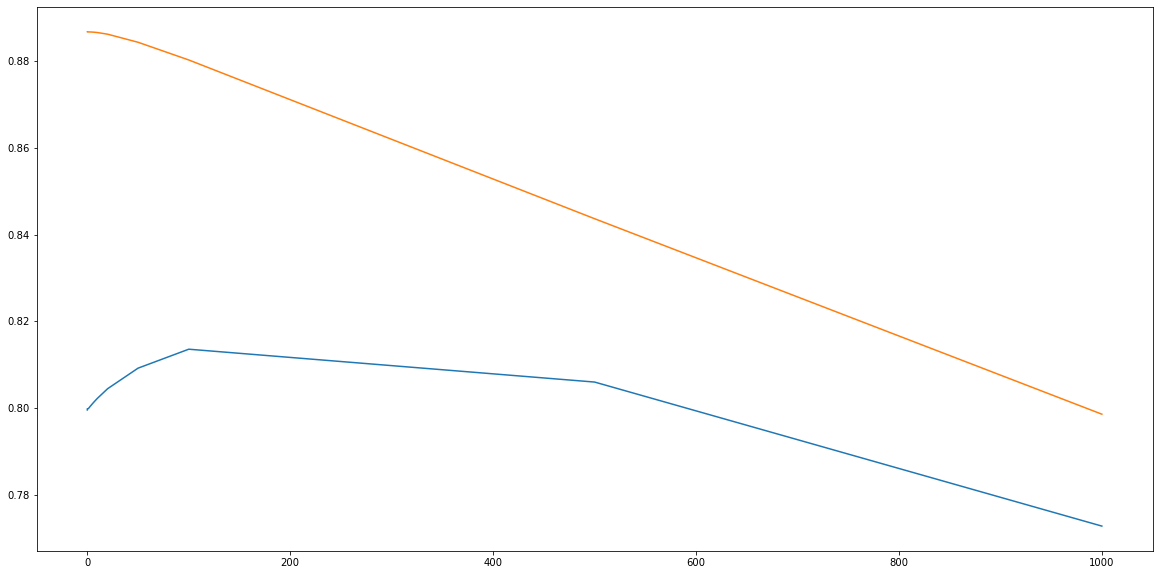

In [1795]:
ridge_output['param_alpha'] = ridge_output['param_alpha'].astype('int32')


plt.figure(figsize=(20,10))
plt.plot(ridge_output['param_alpha'],ridge_output['mean_test_score'])
plt.plot(ridge_output['param_alpha'],ridge_output['mean_train_score'])

From the table and graph above we can see that top rank is alpha 100 from the best fit. Since the test score is at maximum at this point where the r2 score value is high.

In [1796]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 2340.64223596 12421.17845989  4412.67348156  5203.04906407
  2777.29024908 13365.16592886  2350.174343    4668.6642258
  4744.56889696  4939.79824631  4913.15684423  1776.05882382
  3253.44025848  3025.27240946 -3316.30155003 -2013.56956449
  2195.84276607  2077.44073727  3528.54004434 -2795.8682091
 -1662.09133395 -3539.31755924 -2016.46716251 -3242.52956233
 -3674.84166835 -1889.21007325 -3976.76602652 -2711.7213544
  3494.57752225  3294.35070804 -5375.55211109 -3534.14739797
 -1992.58615787 -1021.94503069  1954.78461089  3359.99038856
  1406.02190755  2025.61155286 -2106.4086386   -151.95516717
 -5389.02897349 -4026.46156698 -4680.95708163  2774.53914175
 -2256.17223222  3190.4847744  -1846.00397529 -2080.57706262
  2279.95198729  2417.72778956  3568.45531497 -2288.42833257
  1565.83747988  3014.33607725 -1507.84679039  1762.85793048
  2543.26994922]


In [1797]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train2 = ridge.predict(X_train_rfe)
y_pred_test2 = ridge.predict(X_test)

metric2 = []
r2_train_ridge = r2_score(y_train, y_pred_train2)
print(r2_train_ridge)
metric2.append(r2_train_ridge)

r2_test_ridge= r2_score(y_test, y_pred_test2)
print(r2_test_ridge)
metric2.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train2))
print(rss1_ridge)
metric2.append(rss1_ridge)

rss2_ridge= np.sum(np.square(y_test - y_pred_test2))
print(rss2_ridge)
metric2.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train2)
print(mse_train_ridge)
metric2.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test2)
print(mse_test_ridge)
metric2.append(mse_test_ridge**0.5)

0.8759361408416185
0.8535952218587015
362056784168.9182
227952838569.56128
394397368.3757279
578560503.9836581


### Step 9:Lasso Regression

In [1798]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [1799]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
lasso_output = pd.DataFrame(model_cv.cv_results_)
lasso_output.head(28)

{'alpha': 20}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006335,0.000317,0.002176,0.000028,0.0001,{'alpha': 0.0001},0.676907,0.851223,0.802658,0.862115,0.800192,0.798619,0.065775,25,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
1,0.009781,0.004212,0.002402,0.000204,0.001,{'alpha': 0.001},0.676907,0.851223,0.802658,0.862115,0.800192,0.798619,0.065775,24,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
2,0.005394,0.000057,0.002170,0.000040,0.01,{'alpha': 0.01},0.676907,0.851223,0.802658,0.862116,0.800192,0.798619,0.065775,23,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
3,0.005189,0.000093,0.003317,0.002350,0.05,{'alpha': 0.05},0.676905,0.851224,0.802658,0.862117,0.800192,0.798619,0.065776,22,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
4,0.008381,0.003610,0.002360,0.000154,0.1,{'alpha': 0.1},0.676902,0.851226,0.802659,0.862119,0.800193,0.798620,0.065778,21,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
5,0.011932,0.000786,0.002551,0.000021,0.2,{'alpha': 0.2},0.676897,0.851229,0.802659,0.862122,0.800193,0.798620,0.065781,20,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
6,0.012125,0.001792,0.002523,0.000018,0.3,{'alpha': 0.3},0.676891,0.851232,0.802660,0.862126,0.800194,0.798621,0.065784,19,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
7,0.006175,0.001350,0.002269,0.000138,0.4,{'alpha': 0.4},0.676886,0.851236,0.802660,0.862129,0.800195,0.798621,0.065787,18,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
8,0.011444,0.000275,0.002551,0.000021,0.5,{'alpha': 0.5},0.676880,0.851239,0.802660,0.862133,0.800196,0.798622,0.065791,17,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224
9,0.005489,0.001375,0.002308,0.000203,0.6,{'alpha': 0.6},0.676873,0.851242,0.802661,0.862136,0.800196,0.798622,0.065794,16,0.906829,0.881926,0.879207,0.881139,0.883943,0.886609,0.010224


In [1800]:
lasso_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       28 non-null     float64
 1   std_fit_time        28 non-null     float64
 2   mean_score_time     28 non-null     float64
 3   std_score_time      28 non-null     float64
 4   param_alpha         28 non-null     object 
 5   params              28 non-null     object 
 6   split0_test_score   28 non-null     float64
 7   split1_test_score   28 non-null     float64
 8   split2_test_score   28 non-null     float64
 9   split3_test_score   28 non-null     float64
 10  split4_test_score   28 non-null     float64
 11  mean_test_score     28 non-null     float64
 12  std_test_score      28 non-null     float64
 13  rank_test_score     28 non-null     int32  
 14  split0_train_score  28 non-null     float64
 15  split1_train_score  28 non-null     float64
 16  split2_tra

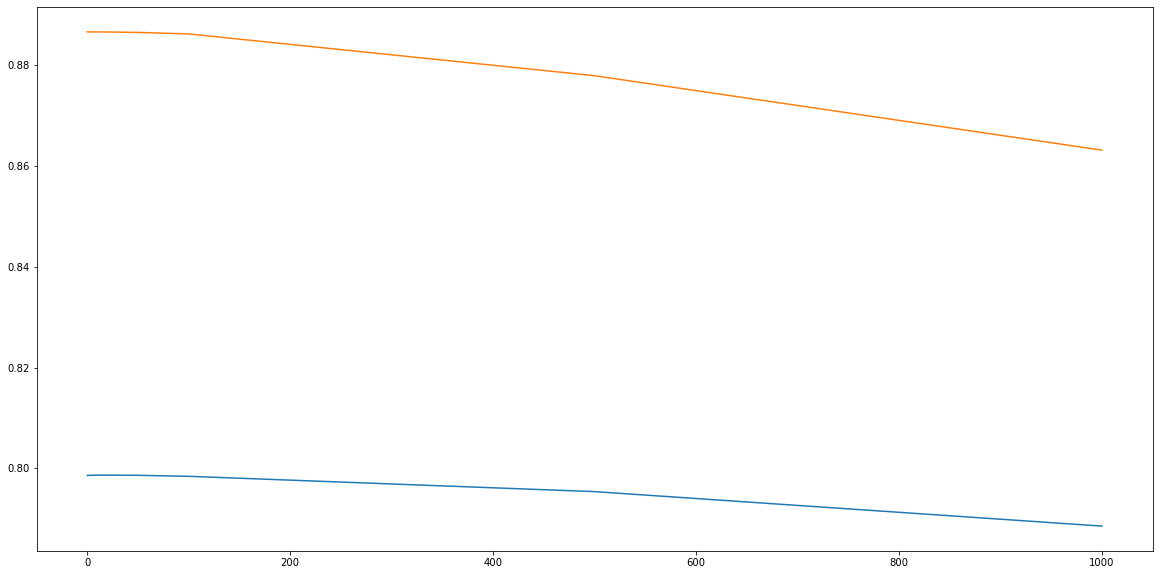

In [1801]:
lasso_output['param_alpha'] = lasso_output['param_alpha'].astype('int32')


plt.figure(figsize=(20,10))
plt.plot(lasso_output['param_alpha'],lasso_output['mean_test_score'])
plt.plot(lasso_output['param_alpha'],lasso_output['mean_train_score'])

From the table and graph above we can see that top rank is alpha 20 from the best fit. Since the test score is at maximum at this point where the r2 score value is high.

In [1802]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [1803]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=20)

In [1804]:
lasso.coef_

array([ 1835.42762158, 13489.77562661,  5129.51070705,  4906.20613118,
        2745.41564725, 15917.460292  ,  2661.06542863,  3225.78542371,
        3995.31489382,  4127.31501311,  4388.36440035,  1738.70700023,
        3408.56944394,  2640.09166406, -3994.95033146, -1893.79805693,
        3178.00002705,  2989.28729815,  5441.64582843, -4365.12473225,
       -3442.39144924, -4827.14067204, -3379.39276478, -4142.08393774,
       -4319.22199175, -2823.10534504, -6615.17861654, -4321.82805371,
        2620.16369374,  3229.10089979, -7572.65153126, -4528.89330919,
       -3371.38632953, -2130.82125745,  1814.74062905,  3924.8556528 ,
        2045.75451563,  2827.35066317, -3471.43490079,  -951.69510593,
       -6089.30498698, -5383.74156051, -6009.01675507,  3211.10903381,
       -2480.7992992 ,  3566.24717339, -2082.05034849, -2213.91001636,
        2334.29540746,  2427.17723485,  3821.02853338, -2527.32040347,
        1727.56764219,  3069.06924216, -1809.76901377,  2409.57126487,
      

In [1805]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train3 = lasso.predict(X_train_rfe)
y_pred_test3 = lasso.predict(X_test)

metric3 = []
r2_train_lasso = r2_score(y_train, y_pred_train3)
print(r2_train_lasso)
metric3.append(r2_train_lasso)

r2_test_lasso  = r2_score(y_test, y_pred_test3)
print(r2_test_lasso)
metric3.append(r2_test_lasso)

rss1_lasso  = np.sum(np.square(y_train - y_pred_train3))
print(rss1_lasso)
metric3.append(rss1_lasso)

rss2_lasso  = np.sum(np.square(y_test - y_pred_test3))
print(rss2_lasso)
metric3.append(rss2_lasso)

mse_train_lasso  = mean_squared_error(y_train, y_pred_train3)
print(mse_train_lasso)
metric3.append(mse_train_lasso**0.5)

mse_test_lasso  = mean_squared_error(y_test, y_pred_test3)
print(mse_test_lasso )
metric3.append(mse_test_lasso **0.5)

0.8805054267232463
0.8555604263823419
348722192100.9845
224893007085.7746
379871668.9553208
570794434.2278543


### Step 10 : Conclusion

In [1806]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric0
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg2_metric = pd.Series(metricr, name = 'Initial Ridge Regression')
ls2_metric = pd.Series(metricl, name = 'Initial Lasso Regression')
lr2_metric = pd.Series(metric, name = 'Lin2 Regression')
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg2_metric,ls2_metric,lr2_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Initial Ridge Regression,Initial Lasso Regression,Lin2 Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.059068e-01,8.740409e-01,8.702373e-01,8.805217e-01,8.759361e-01,8.805054e-01
1,R2 Score (Test),-5.945054e+25,8.508972e-01,8.638707e-01,8.550450e-01,8.535952e-01,8.555604e-01
2,RSS (Train),2.745930e+11,3.675876e+11,3.786878e+11,3.486748e+11,3.620568e+11,3.487222e+11
3,RSS (Test),9.256474e+37,2.321537e+11,2.119538e+11,2.256956e+11,2.279528e+11,2.248930e+11
4,MSE (Train),1.729511e+04,2.001055e+04,2.031044e+04,1.948897e+04,1.985944e+04,1.949030e+04
5,MSE (Test),4.847019e+17,2.427391e+04,2.319383e+04,2.393390e+04,2.405328e+04,2.389130e+04


__Linear Regression__ 


The initial values before the RFE feature selection was -5.945054274778401e+25 for the test set and 0.90 for the training set. This shows that there was clear evidence of overfitting in the model. After RFE feature selection this has changed to 0.88 for the training an 0.855 for the test set, this is big improvement. 


__Ridge Regression__


When the data was inputed directly as X_train (not as a output from Linear), after regularisation r2score  increased up 0.85 compared to -5.945054274778401e+25 in linear regression. But with the use of RFE method with Ridge it got optimised in the process and slightly improved as well in terms of difference between test and train data, Where the train data is 0.876 and test data is at 0.854.


__Lasso Regression__


Similar to Ridge regression after regularisation initial direct input increased the r2score to 0.863 with  RFE feature on top this got improved to Training set at 0.88 and Test set at 0.86

__With the output i would be lean towards using RFE with Ridge or Lasso Regularisation Methods , reason is without RFE alpha for Ridge and Lasso Rigression was 500 and 1000, with the help of RFE this dropped to 100 and 20. This is taking into account the teaching and common word that higher alphas can lead to underfitting.__


__LASSO Regression seems to have done better in this analysis with RSS and MSE lower before and after RFE method compared to Linear Regression and Ridge Regression. Also r2 score value is slightly higher for Lasso Regression.__


__WINNER: LASSO REGRESSION__


In [1807]:
X= X[X_train_rfe.columns]

betas = pd.DataFrame(index=X.columns)

In [1808]:
betas.rows = X.columns

In [1809]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [1810]:
pd.set_option('display.max_rows', None)
betas.head(68).sort_values(by=['Lasso'], ascending=[False])

,Linear,Ridge,Lasso
GrLivArea,15945.411008,13365.165929,15917.460292
OverallQual,13416.941254,12421.178460,13489.775627
LandContour_Lvl,5564.463753,3528.540044,5441.645828
OverallCond,5164.520096,4412.673482,5129.510707
BsmtQual,4902.975891,5203.049064,4906.206131
GarageArea,4365.505505,4913.156844,4388.364400
FireplaceQu,4115.644064,4939.798246,4127.315013
KitchenQual,3977.320036,4744.568897,3995.314894
Condition1_Norm,3963.483676,3359.990389,3924.855653
Foundation_PConc,3856.630845,3568.455315,3821.028533


__Ridge Regression__

From the graph on ridge regression train and test it can be seen that 

Train Score : As the lambda increases this makes the r2 score to decrease, this suggests that it leads to error to be increasing. This is suggesting that the design is becoming more generalised than overfitting. By increasing the alpha the design becomes more generalised.

Test Score: At the lower value of ridge the error is high.From the graph we can see that as the alpha is increasing the error starts decreasing up to the peak point. After the peak point the error is increasing and alpha is decresing. 


__Lasso Regression__


From the graph on ridge regression train and test it can be seen that


Train Score : Error is low at the starting point of lasso regression with fairly high r2 score and slowly peaking to optimal alpha then reducing down gradually as the error increases and design becomes more generalised and simple.

Test Score: Test score follows the same path as the Train score in terms of behaviours.





__TOP TO FEATURES BASED ON THIS WOULD BE__


- __GrLivArea__
- __OverallQual__
- __LandContour_Lvl__
- __OverallCond__
- __BsmtQual__
- __GarageArea__
- __FireplaceQu__
- __Condition1_Norm__
- __Foundation_PConc__
- __Exterior2nd_CmentBd__